In [1]:
%matplotlib notebook
import csv
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [2]:
def pinta_data(x, y):
    pos = np.where(y==1)
    nopos = np.where(y==0)

    plt.scatter(x[pos, 0], x[pos, 1], marker = '+')
    plt.scatter(x[nopos, 0], x[nopos, 1], marker = 'o')

In [3]:
data1 = loadmat('p6/ex6data1.mat')
x1 = data1['X']
y1 = np.ravel(data1['y'])

<IPython.core.display.Javascript object>


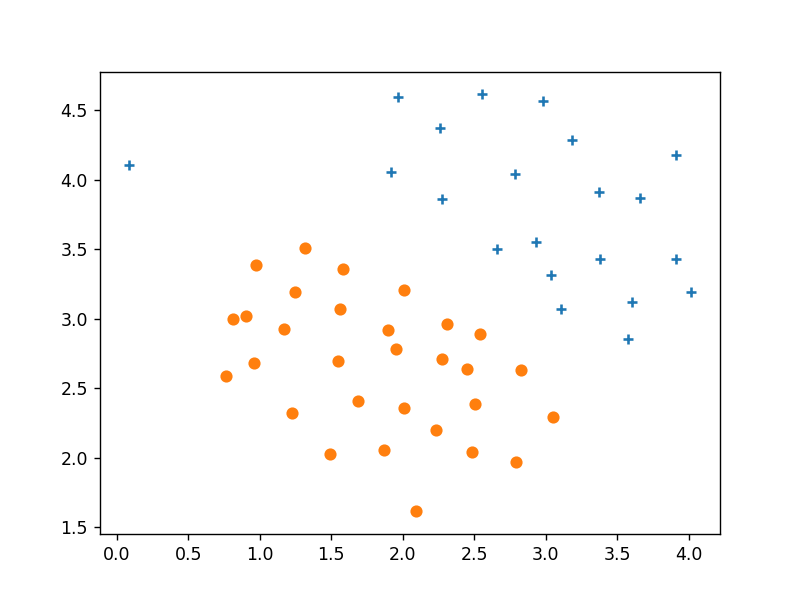

In [4]:
plt.figure()
pinta_data(x1, y1)

In [5]:
def evalua(X, svm):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    return Z, xx1, xx2

In [6]:
def pinta_frontera(X, y, svm):
    plt.figure()
    Z, xx1, xx2 = evalua(X, svm)
    
    plt.contour(xx1, xx2, Z, [0.5], linewidths=1, colors='b')
    pinta_data(X,y)

<IPython.core.display.Javascript object>


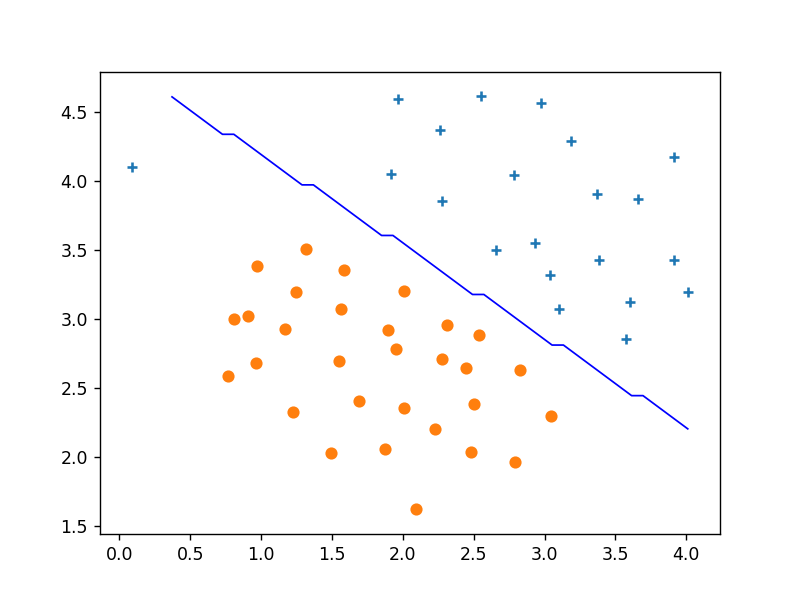

In [7]:
svm = SVC(kernel = 'linear', C=1.0)
z = svm.fit(x1,y1)
pinta_frontera(x1, y1, z)

<IPython.core.display.Javascript object>


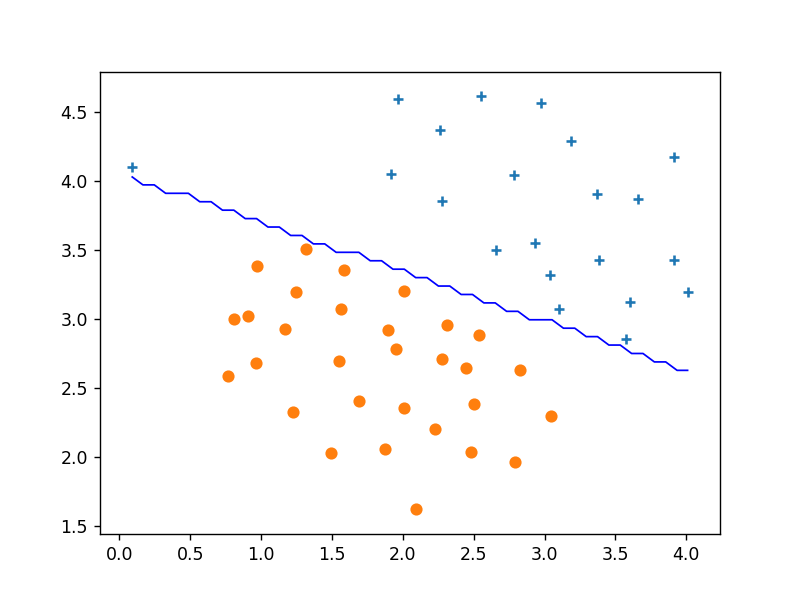

In [8]:
svm = SVC(kernel = 'linear', C=100.0)
z = svm.fit(x1,y1)
pinta_frontera(x1, y1, z)

<IPython.core.display.Javascript object>


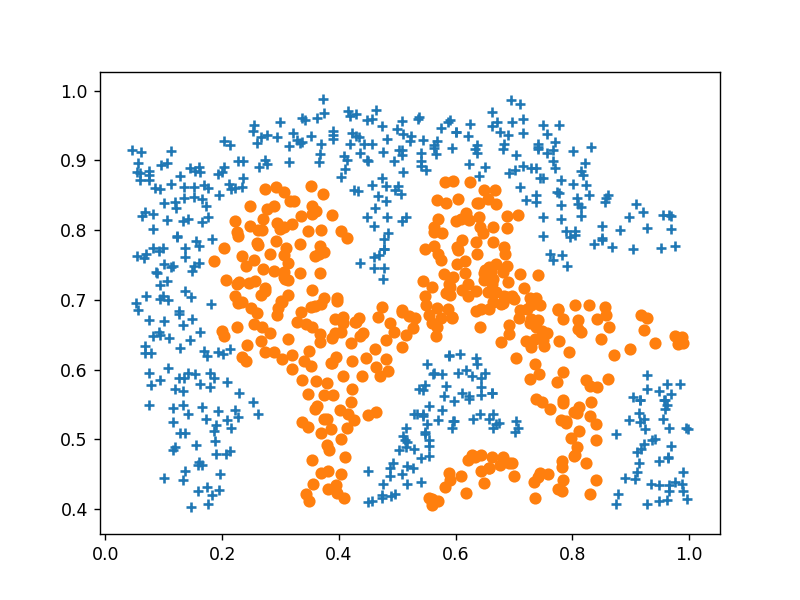

In [9]:
data2 = loadmat('p6/ex6data2.mat')
x2 = data2['X']
y2 = np.ravel(data2['y'])

plt.figure()
pinta_data(x2,y2)

<IPython.core.display.Javascript object>


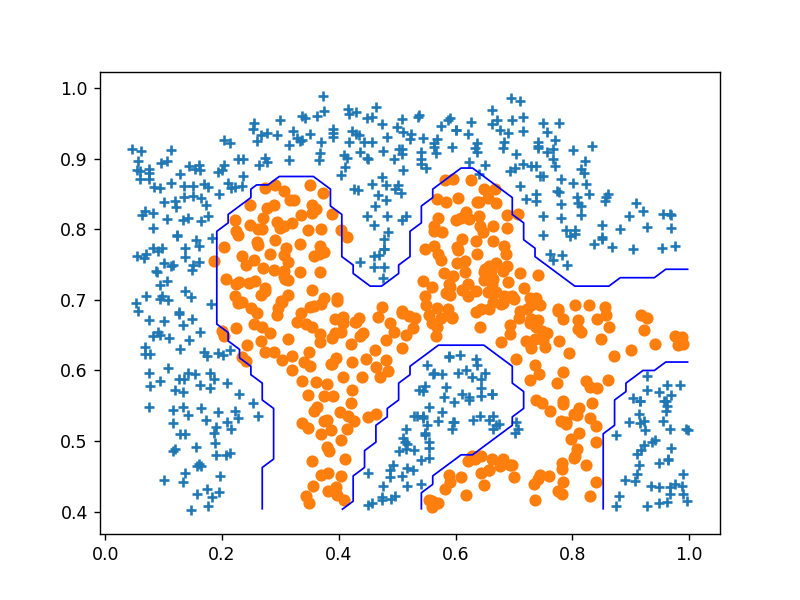

In [10]:
svm = SVC(kernel = 'rbf', C=1, gamma=1 / (2 * 0.1**2))
z = svm.fit(x2,y2)
pinta_frontera(x2, y2, z)

<IPython.core.display.Javascript object>


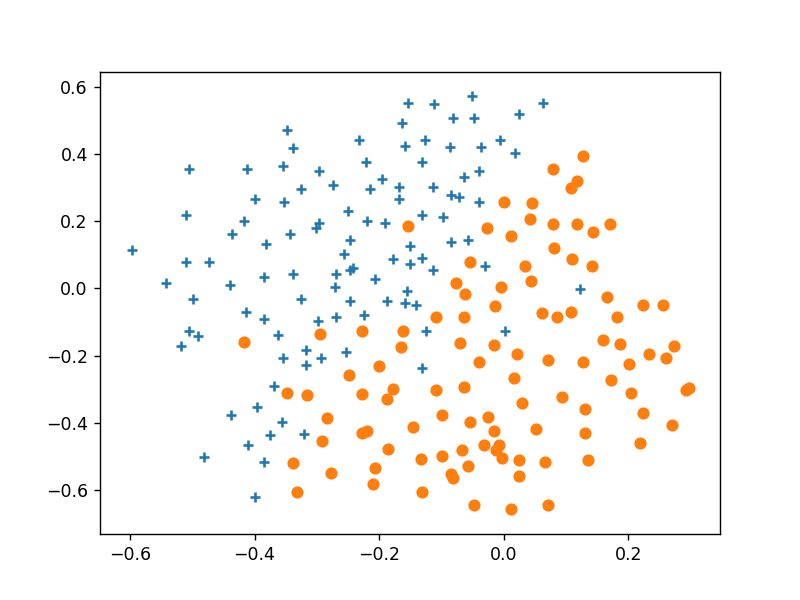

In [11]:
data3 = loadmat('p6/ex6data3.mat')
x3 = data3['X']
y3 = np.ravel(data3['y'])
xval3 = data3['Xval']
yval3 = np.ravel(data3['yval'])

plt.figure()
pinta_data(x3,y3)

In [22]:
#a partir de aquí es caos

values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
results = []
best_config = (0,0)
max_perc = 0

for i in values:
    for j in values:
        svm = SVC(kernel = 'rbf', C=i, gamma=1 / (2 * j**2))
        svm.fit(x3,y3)
        z = svm.predict(xval3)
        #z, aux1, aux2 = evalua(x3, svm)
        new_perc = np.sum(z == yval3)/len(z)
        results.append(new_perc)
        if max_perc < new_perc:
            best_config = (i,j)
            max_perc = new_perc

best_config

(1, 0.01)

<IPython.core.display.Javascript object>


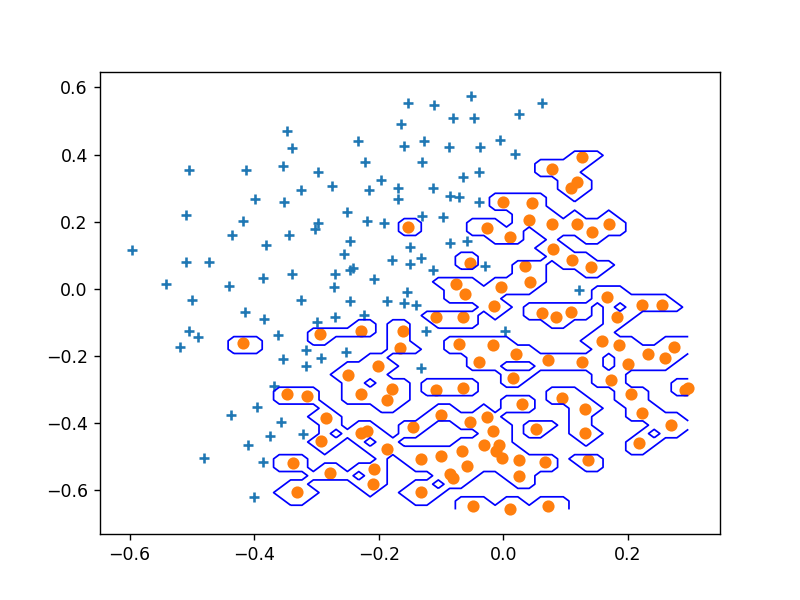

In [16]:
svm = SVC(kernel = 'rbf', C=1, gamma=1 / (2 * 0.01**2))
z = svm.fit(x3,y3)
pinta_frontera(x3,y3, z)